<a href="https://colab.research.google.com/github/cedricbansah/data-science-practice/blob/master/week_7_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Probability of picking a house in the neighbourhood "Old Town"

In [6]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Probability of picking a house in Oldtown three times without replacement

In [9]:
randprob = (houses_in_OldTown/all_houses)*((houses_in_OldTown-1)/(all_houses-1))*((houses_in_OldTown-2)/(all_houses-2))*((houses_in_OldTown-3)/(all_houses-3))
randprob

3.4149701088772053e-05

Checking the skewness of data

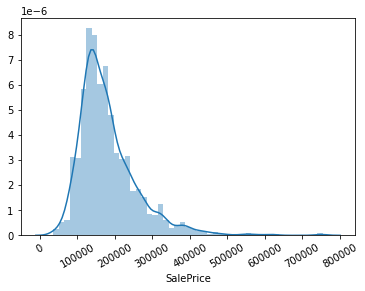

In [13]:
#plot a graph of sale price against its frequency
plt.xticks(rotation = 30)
sns.distplot(data['SalePrice'])

Sample mean and Population mean


*   Consider a sample of 500 houses from 1460 and plot its mean
*   The mean of these 500 houses can be near or far from the mean of the 1460 houses calculated earlier.



In [14]:
np.random.seed(6)
sample_ages = np.random.choice(a=data['SalePrice'],size=500)
print("Sample mean: ",str(sample_ages.mean()))
print("Population mean: ", str(data['SalePrice'].mean()))

Sample mean:  177499.802
Population mean:  180921.19589041095


In [ ]:
from functools import partial

n = np.array([1,2,3,4,5,10,100,200]) # number of samples to average over
N = 500  # number of times samples of size n are taken. 
nobb = 101  # number of bin boundaries on plots
exp_mean = 3  #mean of exponential distribution
a,b = 0.7,0.5  #parameters of beta distribution
dist = [partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names = ["Flat","Exponential (mean = %.1f)" % exp_mean, "beta (a = %.1f , b = %.1f)" % (a,b)]
drange = np.array([[0,1],[0,10],[0,1]])  # ranges of the three distributions
means = np.array([0.5,exp_mean,a/(a+b)]) # means of the three distributions
var = np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a*b)**2)]) # variances of the three distributions

binrange = np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld = len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range (ln):
  for j in range (ld):
    plt.subplot(ln,ld,i*ld+1+j)
    plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],)
    plt.xlim(drange[j])
    if j==0:
        plt.ylabel('n=%i' % n[i],fontsize=15)        
    if i==0:
        plt.title(title_names[j], fontsize=15)
    else:
        clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
        plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()